<a href="https://colab.research.google.com/github/sf-rahul/Tensorflow/blob/master/TransferLearningwithoutDataAug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.2.0-rc2


In [0]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.applications.vgg16 import VGG16 as PretrainedModel, \
  preprocess_input,decode_predictions
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os

In [0]:
!unzip -qq -o dataset.zip

In [0]:
!ls

dataset  dataset.zip  sample_data


In [0]:
!ls dataset/TrainImages/


image10000.jpg	image2245.jpg  image4339.jpg  image6371.jpg  image8240.jpg
image10002.jpg	image2247.jpg  image433.jpg   image6372.jpg  image8243.jpg
image10003.jpg	image2248.jpg  image4343.jpg  image6373.jpg  image8244.jpg
image10004.jpg	image2249.jpg  image4347.jpg  image6375.jpg  image8246.jpg
image10006.jpg	image2251.jpg  image4348.jpg  image6376.jpg  image8247.jpg
image10007.jpg	image2254.jpg  image4349.jpg  image6377.jpg  image8248.jpg
image10011.jpg	image2255.jpg  image4350.jpg  image6381.jpg  image8249.jpg
image10013.jpg	image2257.jpg  image4351.jpg  image6382.jpg  image8250.jpg
image10015.jpg	image2259.jpg  image4352.jpg  image6383.jpg  image8252.jpg
image10016.jpg	image225.jpg   image4353.jpg  image6385.jpg  image8253.jpg
image10017.jpg	image2260.jpg  image4356.jpg  image6386.jpg  image8255.jpg
image10018.jpg	image2261.jpg  image4357.jpg  image6387.jpg  image8256.jpg
image10019.jpg	image2262.jpg  image4358.jpg  image6388.jpg  image8258.jpg
image1001.jpg	image2263.jpg  image4359

In [0]:
!ls dataset/TestImages

image10001.jpg	image2207.jpg  image4355.jpg  image6266.jpg  image8150.jpg
image10005.jpg	image2216.jpg  image4362.jpg  image6267.jpg  image8156.jpg
image10008.jpg	image2217.jpg  image4363.jpg  image6269.jpg  image8164.jpg
image10009.jpg	image2220.jpg  image4373.jpg  image6271.jpg  image8165.jpg
image10010.jpg	image2221.jpg  image4375.jpg  image6272.jpg  image8167.jpg
image10012.jpg	image2226.jpg  image4376.jpg  image6278.jpg  image8169.jpg
image10014.jpg	image2233.jpg  image4377.jpg  image6282.jpg  image8174.jpg
image10023.jpg	image2237.jpg  image4381.jpg  image6285.jpg  image8175.jpg
image10024.jpg	image2238.jpg  image4382.jpg  image6286.jpg  image8177.jpg
image10026.jpg	image2242.jpg  image4387.jpg  image6288.jpg  image8178.jpg
image10027.jpg	image2243.jpg  image438.jpg   image6294.jpg  image8183.jpg
image10028.jpg	image2252.jpg  image4392.jpg  image6297.jpg  image8187.jpg
image10031.jpg	image2253.jpg  image4393.jpg  image6305.jpg  image818.jpg
image10037.jpg	image2256.jpg  image4399

In [0]:
import pandas as pd
train_csv = pd.read_csv('dataset/train.csv')
test_csv = pd.read_csv('dataset/test.csv')

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(train_csv,  test_size=0.1, random_state=1)

In [0]:
X_test

,Image,Class
3159,image4707.jpg,Attire
795,image9827.jpg,misc
4489,image8322.jpg,Food
5781,image8426.jpg,Food
2929,image2346.jpg,Attire
...,...,...
5962,image9284.jpg,Attire
342,image9893.jpg,Attire
2983,image2418.jpg,Attire
2089,image4062.jpg,Attire


In [0]:
train_csv.loc[train_csv['Image'] == 'image273.jpg']['Class']

5365    Food
Name: Class, dtype: object

In [0]:
X_train.loc[X_train['Image']=='image273.jpg']['Class'].empty

False

In [0]:
import cv2
import os
import glob

In [0]:
data=[]
def classifyTheImages(img_dir,type,data_csv):
  #img_dir = "dataset/TrainImages" # Enter Directory of all images 
  data_path = os.path.join(img_dir,'*g')
  files = glob.glob(data_path)
  #data = []
  for f1 in files:
    print(cv2.imread(f1).shape)
    #print(f1.split('/')[2])
    filename= f1.split('/')[2]
    if data_csv.loc[data_csv['Image'] == filename]['Class'].empty==False:
      className = data_csv.loc[data_csv['Image'] == filename]['Class'].item()
      if className == 'Food':
        filename = type+'0'+'_'+filename;
        data.append(filename)
      elif className=='Attire':
        filename=type+'1'+'_'+filename;
        data.append(filename)
      elif className == 'Decorationandsignage':
        filename=type+'2'+'_'+filename;
        data.append(filename)
      elif className=='misc':
        filename=type+'3'+'_'+filename;
        data.append(filename)
      os.rename(r''+ f1,r''+img_dir+'/'+filename)



In [0]:
classifyTheImages("dataset/TrainImages",'tr',X_train)


Streaming output truncated to the last 5000 lines.
(53, 80, 3)
(78, 80, 3)
(99, 80, 3)
(50, 80, 3)
(60, 80, 3)
(53, 80, 3)
(120, 80, 3)
(52, 80, 3)
(60, 80, 3)
(60, 80, 3)
(80, 80, 3)
(53, 80, 3)
(80, 80, 3)
(60, 80, 3)
(66, 80, 3)
(90, 80, 3)
(107, 80, 3)
(80, 80, 3)
(54, 80, 3)
(107, 80, 3)
(53, 80, 3)
(64, 80, 3)
(59, 80, 3)
(80, 80, 3)
(60, 80, 3)
(60, 80, 3)
(53, 80, 3)
(53, 80, 3)
(106, 80, 3)
(54, 80, 3)
(61, 80, 3)
(107, 80, 3)
(80, 80, 3)
(60, 80, 3)
(60, 80, 3)
(120, 80, 3)
(107, 80, 3)
(60, 80, 3)
(65, 80, 3)
(80, 80, 3)
(60, 80, 3)
(142, 80, 3)
(59, 80, 3)
(45, 80, 3)
(120, 80, 3)
(85, 80, 3)
(53, 80, 3)
(53, 80, 3)
(53, 80, 3)
(54, 80, 3)
(80, 80, 3)
(60, 80, 3)
(60, 80, 3)
(60, 80, 3)
(95, 80, 3)
(80, 80, 3)
(80, 80, 3)
(64, 80, 3)
(53, 80, 3)
(53, 80, 3)
(107, 80, 3)
(80, 80, 3)
(80, 80, 3)
(53, 80, 3)
(51, 80, 3)
(120, 80, 3)
(53, 80, 3)
(54, 80, 3)
(60, 80, 3)
(46, 80, 3)
(53, 80, 3)
(60, 80, 3)
(53, 80, 3)
(78, 80, 3)
(53, 80, 3)
(54, 80, 3)
(65, 80, 3)
(121, 80, 3)
(

In [0]:
classifyTheImages("dataset/TrainImages","te",X_test)

Streaming output truncated to the last 5000 lines.
(104, 80, 3)
(120, 80, 3)
(60, 80, 3)
(80, 80, 3)
(60, 80, 3)
(178, 80, 3)
(60, 80, 3)
(53, 80, 3)
(54, 80, 3)
(60, 80, 3)
(54, 80, 3)
(120, 80, 3)
(53, 80, 3)
(80, 80, 3)
(54, 80, 3)
(53, 80, 3)
(60, 80, 3)
(51, 80, 3)
(53, 80, 3)
(60, 80, 3)
(53, 80, 3)
(60, 80, 3)
(60, 80, 3)
(60, 80, 3)
(60, 80, 3)
(120, 80, 3)
(60, 80, 3)
(60, 80, 3)
(56, 80, 3)
(81, 80, 3)
(107, 80, 3)
(107, 80, 3)
(58, 80, 3)
(60, 80, 3)
(45, 80, 3)
(53, 80, 3)
(120, 80, 3)
(82, 80, 3)
(53, 80, 3)
(107, 80, 3)
(53, 80, 3)
(80, 80, 3)
(80, 80, 3)
(120, 80, 3)
(80, 80, 3)
(84, 80, 3)
(53, 80, 3)
(107, 80, 3)
(53, 80, 3)
(163, 80, 3)
(53, 80, 3)
(120, 80, 3)
(53, 80, 3)
(53, 80, 3)
(53, 80, 3)
(60, 80, 3)
(120, 80, 3)
(53, 80, 3)
(75, 80, 3)
(53, 80, 3)
(60, 80, 3)
(108, 80, 3)
(60, 80, 3)
(60, 80, 3)
(53, 80, 3)
(107, 80, 3)
(107, 80, 3)
(107, 80, 3)
(85, 80, 3)
(53, 80, 3)
(120, 80, 3)
(60, 80, 3)
(60, 80, 3)
(53, 80, 3)
(60, 80, 3)
(45, 80, 3)
(80, 80, 3)
(120, 

In [0]:
data

['tr0_image1633.jpg',
 'tr1_image2225.jpg',
 'tr3_image10080.jpg',
 'tr1_image771.jpg',
 'tr3_image2209.jpg',
 'tr0_image1315.jpg',
 'tr0_image1614.jpg',
 'tr0_image6254.jpg',
 'tr1_image4188.jpg',
 'tr0_image4485.jpg',
 'tr0_image10209.jpg',
 'tr2_image1769.jpg',
 'tr3_image4753.jpg',
 'tr0_image10703.jpg',
 'tr1_image2248.jpg',
 'tr3_image6180.jpg',
 'tr2_image86.jpg',
 'tr1_image3203.jpg',
 'tr1_image10048.jpg',
 'tr1_image6059.jpg',
 'tr0_image10404.jpg',
 'tr3_image9355.jpg',
 'tr0_image9900.jpg',
 'tr0_image7990.jpg',
 'tr2_image8038.jpg',
 'tr3_image8931.jpg',
 'tr3_image8906.jpg',
 'tr0_image8788.jpg',
 'tr3_image9204.jpg',
 'tr0_image7612.jpg',
 'tr0_image2677.jpg',
 'tr1_image1350.jpg',
 'tr0_image6588.jpg',
 'tr1_image9574.jpg',
 'tr0_image9306.jpg',
 'tr2_image6966.jpg',
 'tr1_image2758.jpg',
 'tr1_image6771.jpg',
 'tr0_image7488.jpg',
 'tr1_image10391.jpg',
 'tr1_image5840.jpg',
 'tr1_image8854.jpg',
 'tr1_image10303.jpg',
 'tr0_image2915.jpg',
 'tr1_image10306.jpg',
 'tr2

In [0]:
!mkdir data

In [0]:
!mkdir data/train
!mkdir data/test

In [0]:
!mkdir data/train/Food
!mkdir data/train/Attire
!mkdir data/train/Decorationandsignage
!mkdir data/train/misc

In [0]:
!mkdir data/test/Food
!mkdir data/test/Attire
!mkdir data/test/Decorationandsignage
!mkdir data/test/misc

In [0]:
!mv dataset/TrainImages/tr0*.jpg data/train/Food
!mv dataset/TrainImages/tr1*.jpg data/train/Attire
!mv dataset/TrainImages/tr2*.jpg data/train/Decorationandsignage
!mv dataset/TrainImages/tr3*.jpg data/train/misc

!mv dataset/TrainImages/te0*.jpg data/test/Food
!mv dataset/TrainImages/te1*.jpg data/test/Attire
!mv dataset/TrainImages/te2*.jpg data/test/Decorationandsignage
!mv dataset/TrainImages/te3*.jpg data/test/misc


In [0]:
train_path = 'data/train'
valid_path = 'data/test'

In [0]:
IMAGE_SIZE = [200, 200]

In [0]:
# useful for getting number of files
import glob
image_files = glob.glob(train_path + '/*/*.jpg')
valid_image_files = glob.glob(valid_path + '/*/*.jpg')

In [0]:
folders = glob.glob(train_path + '/*')
folders

['data/train/misc',
 'data/train/Attire',
 'data/train/Decorationandsignage',
 'data/train/Food']

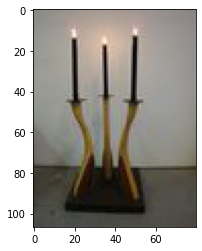

In [0]:
plt.imshow(image.load_img(np.random.choice(image_files)))
plt.show()

In [0]:
ptm = PretrainedModel(
    input_shape=IMAGE_SIZE + [3],
    weights="imagenet",
    include_top=False
)

58892288/58889256 [==============================] - 0s 0us/step


In [0]:
#ptm.trainable=True

In [0]:
K = len(folders)
X = Flatten()(ptm.output)
#X = Dense(K,activation='softmax')(X)



In [0]:
model = Model(inputs=ptm.input,outputs=X)

In [0]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0     

In [0]:
gen_train = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

In [0]:
batch_size = 128
train_generator = gen_train.flow_from_directory(
    train_path,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    class_mode='categorical'
)
valid_generator = gen_train.flow_from_directory(
  valid_path,
  target_size=IMAGE_SIZE,
  batch_size=batch_size,
  class_mode='categorical'
)

Found 5384 images belonging to 4 classes.
Found 599 images belonging to 4 classes.


In [0]:
Ntrain = len(image_files)
Nvalid = len(valid_image_files)

#feagure out the output size.
feature = model.predict(np.random.random([1]+IMAGE_SIZE+[3]))
D=feature.shape[1]
feature.shape






(1, 18432)

In [0]:
X_train = np.zeros((Ntrain,D))
Y_train=np.zeros((Ntrain,K))
X_valid = np.zeros((Nvalid,D))
Y_valid = np.zeros((Nvalid,K))

In [0]:
#populate x train and y train
i =0
for x,y in train_generator:
  #get features.
  features = model.predict(x)
  #batch size can vary:
  size = len(y)
  X_train[i:i+size]=features
  Y_train[i:i+size]=y

  #increment i
  i=i+size
  print(i)

  if i >=Ntrain:
    print('breaking now')
    break;

print(i)




128
256
384
512
640
768
896
1024
1152
1280
1408
1536
1664
1792
1920
2048
2176
2304
2432
2560
2688
2816
2944
3072
3200
3328
3456
3584
3712
3840
3968
4096
4224
4352
4480
4608
4736
4864
4872
5000
5128
5256
5384
breaking now
5384


In [1]:
# populate X_valid and Y_valid
i = 0
for x, y in valid_generator:
  # get features
  features = model.predict(x)
  
  # size of the batch (may not always be batch_size)
  sz = len(y)
  print(y)
  
  # assign to X_train and Ytrain
  X_valid[i:i + sz] = features
  Y_valid[i:i + sz] = y
  
  # increment i
  i += sz

  if i >= Nvalid:
    print('breaking now')
    break
print(i)

NameError: ignored

In [0]:
X_train.max(), X_train.min()

(432.1493225097656, 0.0)

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train2 = scaler.fit_transform(X_train)
X_valid2 = scaler.transform(X_valid)

In [0]:
i = Input(shape=(D,))
x = Dense(K, activation='sigmoid')(i)
linearmodel = Model(i, x)

In [0]:
import tensorflow_addons as tfa

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=[tfa.metrics.F1Score(num_classes=K,average='weighted')])

In [0]:
r = model.fit(
  train_generator,
  validation_data=valid_generator,
  epochs=8,
  steps_per_epoch=int(np.ceil(len(image_files) / batch_size)),
  validation_steps=int(np.ceil(len(valid_image_files) / batch_size)),
)

Epoch 1/8
43/43 [==============================] - 69s 2s/step - loss: 6.9475 - f1_score: 0.3222 - val_loss: 1.3482 - val_f1_score: 0.2912
Epoch 2/8
43/43 [==============================] - 69s 2s/step - loss: 1.2870 - f1_score: 0.3039 - val_loss: 1.3864 - val_f1_score: 0.1949
Epoch 3/8
43/43 [==============================] - 69s 2s/step - loss: 1.2846 - f1_score: 0.3241 - val_loss: 1.2658 - val_f1_score: 0.3316
Epoch 4/8
43/43 [==============================] - 69s 2s/step - loss: 1.2622 - f1_score: 0.3445 - val_loss: 1.2743 - val_f1_score: 0.3481
Epoch 5/8
43/43 [==============================] - 69s 2s/step - loss: 1.2446 - f1_score: 0.3778 - val_loss: 1.2304 - val_f1_score: 0.3971
Epoch 6/8
43/43 [==============================] - 69s 2s/step - loss: 1.2225 - f1_score: 0.4081 - val_loss: 1.1909 - val_f1_score: 0.4270
Epoch 7/8
43/43 [==============================] - 69s 2s/step - loss: 1.2226 - f1_score: 0.4027 - val_loss: 1.2105 - val_f1_score: 0.3950
Epoch 8/8
43/43 [==========

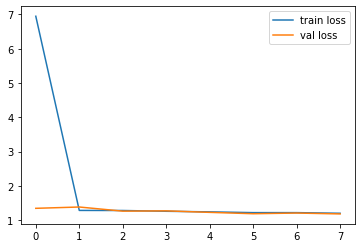

In [0]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

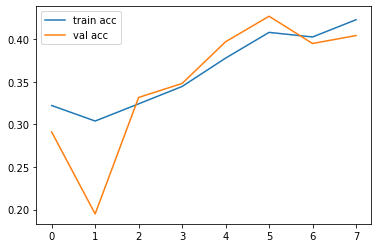

In [0]:
plt.plot(r.history['f1_score'], label='train acc')
plt.plot(r.history['val_f1_score'], label='val acc')
plt.legend()
plt.show()

In [0]:
import glob
img_dir = "dataset/TestImages" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
data=[]
for f1 in test_csv['Image']:
    img = cv2.imread(img_dir+'/'+f1)
    img = tf.image.resize(img,(200,200))
    img=img.numpy()
    data.append(img)
    

In [0]:
x=model.predict(preprocess_input(np.array(data)))

In [0]:
dict = {0:'Food',1:'Attire',2:'Decorationandsignage',3:'misc'}
outputs =[]
for i in x:
  m =max(i)
  index = np.where(i == m)
  print(m,index[0],dict[index[0].item()])
  outputs.append(dict[index[0].item()])
  print('---------------')

Streaming output truncated to the last 5000 lines.
---------------
0.42164963 [2] Decorationandsignage
---------------
0.34656078 [2] Decorationandsignage
---------------
0.39580914 [2] Decorationandsignage
---------------
0.45582283 [0] Food
---------------
0.34656236 [1] Attire
---------------
0.48935252 [0] Food
---------------
0.7842374 [1] Attire
---------------
0.61715084 [2] Decorationandsignage
---------------
0.39868528 [1] Attire
---------------
0.57541114 [2] Decorationandsignage
---------------
0.64870924 [2] Decorationandsignage
---------------
0.41068164 [0] Food
---------------
0.30399293 [3] misc
---------------
0.4053362 [2] Decorationandsignage
---------------
0.37698925 [2] Decorationandsignage
---------------
0.47241196 [2] Decorationandsignage
---------------
0.43668395 [0] Food
---------------
0.4641031 [1] Attire
---------------
0.32317153 [2] Decorationandsignage
---------------
0.63338834 [1] Attire
---------------
0.42786625 [3] misc
---------------
0.518498 [

In [0]:
np.array(outputs)
outpu2=np.expand_dims(np.array(outputs),axis=-1)

In [0]:
outpu2.shape

(3219, 1)

In [0]:
final=np.concatenate((test_csv,outpu2),axis=1)

In [0]:
header = np.array([['Image','Class']])
header.shape

(1, 2)

In [0]:
final

array([['image6245.jpg', 'Food'],
       ['image10409.jpg', 'Food'],
       ['image8692.jpg', 'Food'],
       ...,
       ['image3442.jpg', 'Food'],
       ['image8178.jpg', 'Food'],
       ['image5367.jpg', 'Food']], dtype=object)

In [0]:
final_array = np.concatenate((header,final),axis=0)
final_array

array([['Image', 'Class'],
       ['image6245.jpg', 'Attire'],
       ['image10409.jpg', 'misc'],
       ...,
       ['image3442.jpg', 'misc'],
       ['image8178.jpg', 'misc'],
       ['image5367.jpg', 'Decorationandsignage']], dtype=object)

In [0]:
np.savetxt("Image_File3.csv", np.asarray(final_array),fmt='%s',delimiter =',')